<h1>Posttest Praktikum Sistem Informasi </h1>

NIM : 2109116062

NAMA : Wilda Azizah


1. Visualisasi
2. Penerapan Algoritma Naive Bayes

## Business Understanding & Data Understanding

Importlah pandas, seaborn, dan plotly

Download dataset dari link ini [**Link Dataset**](https://github.com/fnikolas-r/Data-Mining-Course/blob/main/Pertemuan%202/ChurnBank.csv)




Kemudian taruhlah dalam sebuah variabel bernama df


*note: kalian dapat menambah blok yang ada*

In [22]:
import pandas as pd
import seaborn as sns
import plotly.express as px

df = pd.read_csv("ChurnBank.csv")
df
#untuk menampilkan dan membaca dataset csv

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
0,6036,720010608,Attrited Customer,37,M,Unknown,Single,$40K - $60K,Blue,10226.0
1,6684,711323283,Attrited Customer,57,M,Uneducated,Married,$60K - $80K,Blue,2527.0
2,4272,794707083,Attrited Customer,50,M,College,Single,$80K - $120K,Blue,3495.0
3,9759,709657533,Attrited Customer,44,M,High School,Unknown,$120K +,Blue,7793.0
4,4740,716625033,Attrited Customer,32,F,Graduate,Single,Less than $40K,Blue,2761.0
5,9597,715076358,Attrited Customer,57,M,Post-Graduate,Unknown,$80K - $120K,Blue,23714.0
6,5009,804829533,Attrited Customer,59,M,High School,Single,$60K - $80K,Blue,24621.0
7,8200,712144158,Attrited Customer,53,F,Graduate,Single,Less than $40K,Blue,2370.0
8,5016,795599883,Attrited Customer,57,F,Uneducated,Married,Unknown,Blue,2404.0
9,8350,709222008,Attrited Customer,41,M,Unknown,Single,$80K - $120K,Blue,4742.0


### Business Understanding

Disini kamu berandai andai bahwa kamu adalah direktur sebuah perusahaan, kamu menggunakan dataset ini dan akan menggunakan algoritma Naive Bayes untuk perkembangan perusahaan kamu. Jelaskan tujuan penggunaan dataset ini, tujuan perusahaan, serta tujuan dari penggunaan naive bayes (beri penjelasan di text ini)

### Data Understanding

In [23]:
df.info()
# untuk menampilkan informasi pada dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20 non-null     int64  
 1   CLIENTNUM        20 non-null     int64  
 2   Attrition_Flag   20 non-null     object 
 3   Customer_Age     20 non-null     int64  
 4   Gender           20 non-null     object 
 5   Education_Level  20 non-null     object 
 6   Marital_Status   20 non-null     object 
 7   Income_Category  20 non-null     object 
 8   Card_Category    20 non-null     object 
 9   Credit_Limit     20 non-null     float64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.7+ KB


In [57]:
df1 = df[df["Attrition_Flag"]=="Attrited Customer"] #akan mengambil baris-baris di dataframe yang mempunyai nilai kolom "Attrition_Flag" yang sama dengan "Attrited Customer".
df2 = df[df["Attrition_Flag"]!="Attrited Customer"] #akan mengambil baris-baris di dataframe yang mempunyai nilai kolom "Attrition_Flag" tidak sama dengan "Attrited Customer".
df3 = df[df["Customer_Age"]<50] #akan mengambil baris-baris di dataframe yang mempunyai nilai kolom "Customer_Age" kurang dari 50 tahun.
df4 = df[df["Marital_Status"]=="Single"] #akan mengambil baris-baris di dataframe yang mempunyai nilai kolom "Marital_Status" sama dengan "Single".

In [79]:
df1

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
0,6036,720010608,Attrited Customer,37,M,Unknown,Single,$40K - $60K,Blue,10226.0
1,6684,711323283,Attrited Customer,57,M,Uneducated,Married,$60K - $80K,Blue,2527.0
2,4272,794707083,Attrited Customer,50,M,College,Single,$80K - $120K,Blue,3495.0
3,9759,709657533,Attrited Customer,44,M,High School,Unknown,$120K +,Blue,7793.0
4,4740,716625033,Attrited Customer,32,F,Graduate,Single,Less than $40K,Blue,2761.0
5,9597,715076358,Attrited Customer,57,M,Post-Graduate,Unknown,$80K - $120K,Blue,23714.0
6,5009,804829533,Attrited Customer,59,M,High School,Single,$60K - $80K,Blue,24621.0
7,8200,712144158,Attrited Customer,53,F,Graduate,Single,Less than $40K,Blue,2370.0
8,5016,795599883,Attrited Customer,57,F,Uneducated,Married,Unknown,Blue,2404.0
9,8350,709222008,Attrited Customer,41,M,Unknown,Single,$80K - $120K,Blue,4742.0


In [ ]:
df2

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
10,8139,809844108,Existing Customer,48,M,Doctorate,Single,$60K - $80K,Blue,8086.0
11,176,716264358,Existing Customer,53,M,Uneducated,Married,$80K - $120K,Blue,26792.0
12,8020,778163508,Existing Customer,37,F,High School,Married,Unknown,Blue,5245.0
13,357,711857733,Existing Customer,49,M,Uneducated,Single,$60K - $80K,Blue,18584.0
14,6562,720070383,Existing Customer,41,F,Uneducated,Single,Unknown,Blue,2429.0
15,4563,809809008,Existing Customer,47,F,Graduate,Married,Less than $40K,Blue,3111.0
16,10084,718161708,Existing Customer,46,F,Graduate,Married,Less than $40K,Blue,7562.0
17,5725,771079833,Existing Customer,40,F,High School,Single,Less than $40K,Blue,1438.3
18,2587,711639708,Existing Customer,42,M,Graduate,Single,$60K - $80K,Blue,1438.3
19,8226,713700258,Existing Customer,55,F,Post-Graduate,Married,Unknown,Blue,2953.0


In [ ]:
df3

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
0,6036,720010608,Attrited Customer,37,M,Unknown,Single,$40K - $60K,Blue,10226.0
3,9759,709657533,Attrited Customer,44,M,High School,Unknown,$120K +,Blue,7793.0
4,4740,716625033,Attrited Customer,32,F,Graduate,Single,Less than $40K,Blue,2761.0
9,8350,709222008,Attrited Customer,41,M,Unknown,Single,$80K - $120K,Blue,4742.0
10,8139,809844108,Existing Customer,48,M,Doctorate,Single,$60K - $80K,Blue,8086.0
12,8020,778163508,Existing Customer,37,F,High School,Married,Unknown,Blue,5245.0
13,357,711857733,Existing Customer,49,M,Uneducated,Single,$60K - $80K,Blue,18584.0
14,6562,720070383,Existing Customer,41,F,Uneducated,Single,Unknown,Blue,2429.0
15,4563,809809008,Existing Customer,47,F,Graduate,Married,Less than $40K,Blue,3111.0
16,10084,718161708,Existing Customer,46,F,Graduate,Married,Less than $40K,Blue,7562.0


In [ ]:
df4

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
0,6036,720010608,Attrited Customer,37,M,Unknown,Single,$40K - $60K,Blue,10226.0
2,4272,794707083,Attrited Customer,50,M,College,Single,$80K - $120K,Blue,3495.0
4,4740,716625033,Attrited Customer,32,F,Graduate,Single,Less than $40K,Blue,2761.0
6,5009,804829533,Attrited Customer,59,M,High School,Single,$60K - $80K,Blue,24621.0
7,8200,712144158,Attrited Customer,53,F,Graduate,Single,Less than $40K,Blue,2370.0
9,8350,709222008,Attrited Customer,41,M,Unknown,Single,$80K - $120K,Blue,4742.0
10,8139,809844108,Existing Customer,48,M,Doctorate,Single,$60K - $80K,Blue,8086.0
13,357,711857733,Existing Customer,49,M,Uneducated,Single,$60K - $80K,Blue,18584.0
14,6562,720070383,Existing Customer,41,F,Uneducated,Single,Unknown,Blue,2429.0
17,5725,771079833,Existing Customer,40,F,High School,Single,Less than $40K,Blue,1438.3


#### Explore Data

##### Visualisasi Comparison

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

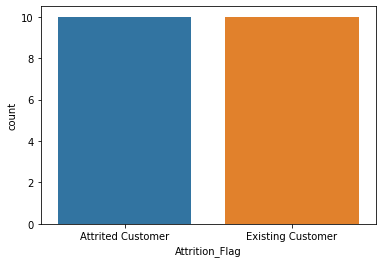

In [24]:
sns.countplot(data=df,x="Attrition_Flag") #untuk membuat plot bar chart yang menampilkan jumlah pengamatan pada setiap kategori pada variabel "Attrition_Flag" pada data frame "df".

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

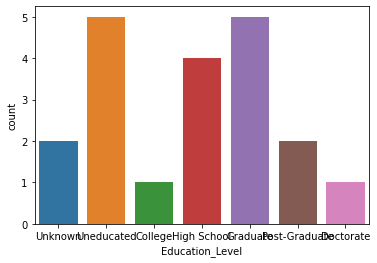

In [25]:
sns.countplot(data=df,x="Education_Level") #membuat count plot yang menampilkan jumlah observasi setiap kategori divariabel "Education_Level" yang tersimpan dalam variabel "df".

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

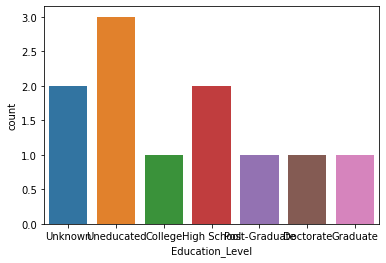

In [63]:
sns.countplot(data=df[df["Gender"] == "M"],x="Education_Level") #membuat histogram yang menampilkan distribusi data kolom "Education_Level" pada dataset df."
#untuk baris yang memiliki nilai "Gender"

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

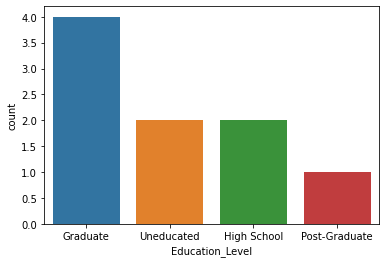

In [27]:
sns.countplot(data=df[df["Gender"] == "F"],x="Education_Level")

##### Visualisasi Distribution


<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

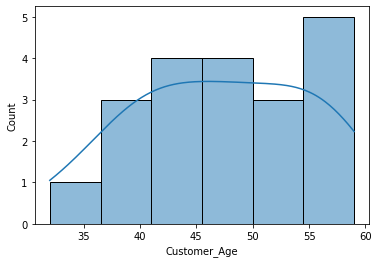

In [66]:
sns.histplot(data=df,x="Customer_Age",kde=True) #menbuat historgram untuk customer dan credit card limit

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

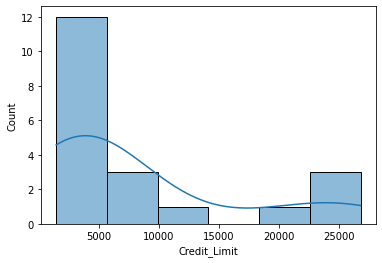

In [68]:
sns.histplot(data=df,x="Credit_Limit",kde=True)

##### Visualisasi Relationship




<AxesSubplot:xlabel='Customer_Age', ylabel='Credit_Limit'>

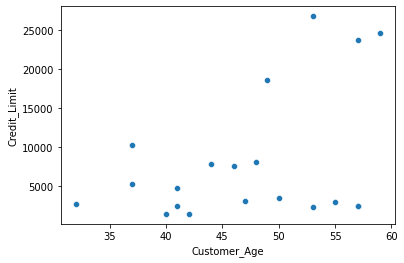

In [69]:
sns.scatterplot(data=df,x="Customer_Age",y="Credit_Limit")
# untuk menampilkan hubungan antar kolom "Customer_Age" dengan "Credit_Limit"

##### Visualisasi Composition




In [31]:
px.pie(df,names="Income_Category")
# membuat grafik lingkaran atau pie chart
# mengelompokkan data berdasarkan nilai pada kolom "Income_Category". 

In [81]:
px.pie(df,names="Education_Level")
# membuat grafik lingkaran atau pie chart
# mengelompokkan data berdasarkan nilai pada kolom "Education_Level". 

###Opsional

<AxesSubplot:xlabel='Gender', ylabel='Credit_Limit'>

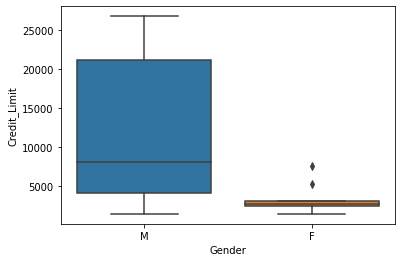

In [32]:
sns.boxplot(data=df,x='Gender', y='Credit_Limit')
# membuat sebuah boxplot (diagram kotak) dengan variabel Gender pada sumbu x dan variabel Credit_Limit pada sumbu y dari sebuah dataframe.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

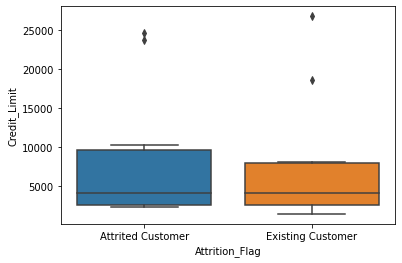

In [34]:
sns.boxplot(data=df,x='Attrition_Flag', y='Credit_Limit')
# membuat sebuah boxplot (diagram kotak) dengan variabel Attrition_Flag pada sumbu x dan variabel Credit_Limit pada sumbu y dari sebuah dataframe.
     

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

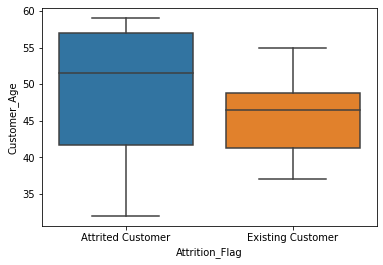

In [35]:
sns.boxplot(data=df,x='Attrition_Flag', y='Customer_Age')
# membuat sebuah boxplot (diagram kotak) dengan variabel Attrition_Flag pada sumbu x dan variabel Customer_Age pada sumbu y dari sebuah dataframe df.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

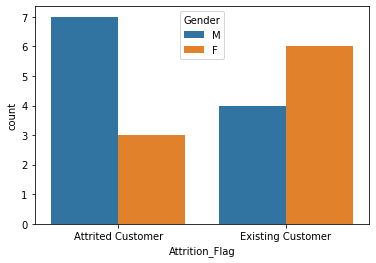

In [36]:
sns.countplot(data=df,x='Attrition_Flag', hue='Gender')
# membuat sebuah diagram kotak dengan variabel Attrition_Flag pada sumbu x dan variabel Gender pada sumbu y dari sebuah dataframe.

<AxesSubplot:>

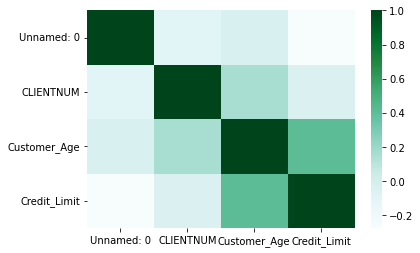

In [43]:
# membuat visualisasi heatmap untuk Setiap variabel numerik yang ada
sns.heatmap(df.corr(), cmap="BuGn")


## Algoritma Naive Bayes dan Preprocessing (pengenalan)

In [ ]:
# sebelum membuat algoritma pertama tama buatlah dataset baru dengan ketentuan
# mengambil dataset df
# Menghapus kolom Unnamed: 0, CLIENTNUM, Umur, dan Limit Kartu Kredit (initinya yang berupa primary key dan bukan tipe kategori)
# dataset dengan kolom yang sudah dihapus tadi kemudian disimpan di dataframe baru (df baru)


In [78]:
# Buatlah sebuah fungsi naive bayes dengan ketentuan
# Mengambil data dari dataframe yang telah diproses pada blok sebelumnya (diatas)
# Nama fungsinya adalah naive_bayes
# Mengambil 1 saja parameter yaitu sebuah list berisi kategori

# Outputnya berupa prediksi Attrited Customer atau Existing Customer
# Outputnya berupa tuple (_hasilnya, persentasenya berapa) contoh (Existing Customer, 0.004)

# Tidak boleh menggunakan library manapun selain pandas dan numpy

import numpy as np
import pandas as pd

df_new = df.drop(['Unnamed: 0', 'CLIENTNUM', 'Customer_Age', 'Credit_Limit'], axis=1)

def naive_bayes(kategori):
    totally = len(df_new)
    target_counts = df_new['Attrition_Flag'].value_counts()
    existing_count = target_counts['Existing Customer']
    attrited_count = target_counts['Attrited Customer']

    existing_lklihood = 1
    attrited_lklihood = 1

    for key, value in kategori.items():
        existing_lklihood = (len(df_new[(df_new[key] == value) & (df_new['Attrition_Flag'] == 'Existing Customer')]) / existing_count)
        attrited_lklihood= (len(df_new[(df_new[key] == value) & (df_new['Attrition_Flag'] == 'Attrited Customer')]) / attrited_count)

    existing_posterior = existing_lklihood * (existing_count / totally)
    attrited_posterior = attrited_lklihood * (attrited_count / totally)

    if existing_posterior > attrited_posterior:
        return ('Existing Customer', round(existing_posterior, 3))
    else:
        return ('Attrited Customer', round(attrited_posterior, 3))


hsl = naive_bayes({'Gender': 'F', 'Education_Level': 'High School'})

hsl
     

('Attrited Customer', 0.1)